# Lid-Driven Cavity case (LDC)

This test case considers a box with a moving lid, where the velocity is initially at rest.

We start by loading IncompressibleNavierStokes.

In [1]:
using IncompressibleNavierStokes

A [Makie](https://github.com/JuliaPlots/Makie.jl) plotting backend is needed
for plotting. `GLMakie` creates an interactive window (useful for real-time
plotting), but does not work when building this example on GitHub.
`CairoMakie` makes high-quality static vector-graphics plots.

In [2]:
if haskey(ENV, "GITHUB_ACTIONS")
    using CairoMakie
else
    using GLMakie
end

## Build problem

We may choose the floating point type for the simulations. Replacing `Float64` with
`Float32` will not necessarilily speed up the simulations, but requires half as much
memory.

In [3]:
T = Float64

Float64

Available viscosity models are:

- `LaminarModel`,
- `KEpsilonModel`,
- `MixingLengthModel`,
- `SmagorinskyModel`, and
- `QRModel`.

They all take a Reynolds number as a parameter. Here we choose a moderate Reynolds number.

In [4]:
viscosity_model = LaminarModel{T}(; Re = 1000)

LaminarModel{Float64}(1000.0)

Available convection models are:

- `NoRegConvectionModel`,
- `C2ConvectionModel`,
- `C4ConvectionModel`, and
- `LerayConvectionModel`.

We here take the simplest model.

In [5]:
convection_model = NoRegConvectionModel()

NoRegConvectionModel()

Dirichlet boundary conditions are specified as plain Julia functions. They are marked by
the `:dirichlet` symbol. Other possible BC types are `:periodic`, `:symmetric`, and `:pressure`.

In [6]:
u_bc(x, y, t) = y ≈ 1 ? 1.0 : 0.0
v_bc(x, y, t) = zero(x)
boundary_conditions = BoundaryConditions(
    u_bc,
    v_bc;
    bc_unsteady = false,
    bc_type = (;
        u = (; x = (:dirichlet, :dirichlet), y = (:dirichlet, :dirichlet)),
        v = (; x = (:dirichlet, :dirichlet), y = (:dirichlet, :dirichlet)),
    ),
    T,
)

BoundaryConditions{Float64}(false, (x = (:dirichlet, :dirichlet), y = (:dirichlet, :dirichlet)), (x = (:dirichlet, :dirichlet), y = (:dirichlet, :dirichlet)), NamedTuple(), NamedTuple(), NamedTuple(), NamedTuple(), Main.var"##319".u_bc, Main.var"##319".v_bc, IncompressibleNavierStokes.var"#43#67"(), IncompressibleNavierStokes.var"#44#68"(), IncompressibleNavierStokes.var"#45#69"(), IncompressibleNavierStokes.var"#46#70"(), (x = (0.0, 0.0), y = (0.0, 0.0)), (x = (0.0, 0.0), y = (0.0, 0.0)), (x = (0.0, 0.0), y = (0.0, 0.0)))

We create a two-dimensional domain with a box of size `[1, 1]`. We add a slight scaling
factor of 95% to increase the precision near the moving lid.

In [7]:
x = cosine_grid(0.0, 1.0, 50)
y = stretched_grid(0.0, 1.0, 50, 0.95)
grid = Grid(x, y; boundary_conditions, T)

Grid{Float64, 2}(false, 81.0, 1.125, 50, 50, 1, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), [0.0, 0.0009866357858642205, 0.003942649342761062, 0.00885637463565564, 0.015708419435684462, 0.024471741852423234, 0.03511175705587427, 0.04758647376699027, 0.06184665997806821, 0.07783603724899246  …  0.9221639627510074, 0.9381533400219317, 0.9524135262330098, 0.9648882429441257, 0.9755282581475768, 0.9842915805643155, 0.9911436253643443, 0.9960573506572389, 0.9990133642141358, 1.0], [0.0, 0.054167951704709075, 0.10562750582418264, 0.15451408223768262, 0.20095632983050754, 0.24507646504369132, 0.28699059349621575, 0.3268090155261141, 0.3646365164545174, 0.40057264233650064  …  0.9510954685787368, 0.9577086468545091, 0.9639911662164926, 0.969959559610377, 0.9756295333345673, 0.981016008372548, 0.9861331596586296, 0.990994453380407, 0.9956126824160958, 1.0], Float64[], [0.0004933178929321103, 0.0024646425643126413, 0.006399511989208351, 0.01228239703567005, 0.020090080644053848, 0.029791749454148753, 0.

The grid may be visualized using the `plot_grid` function.

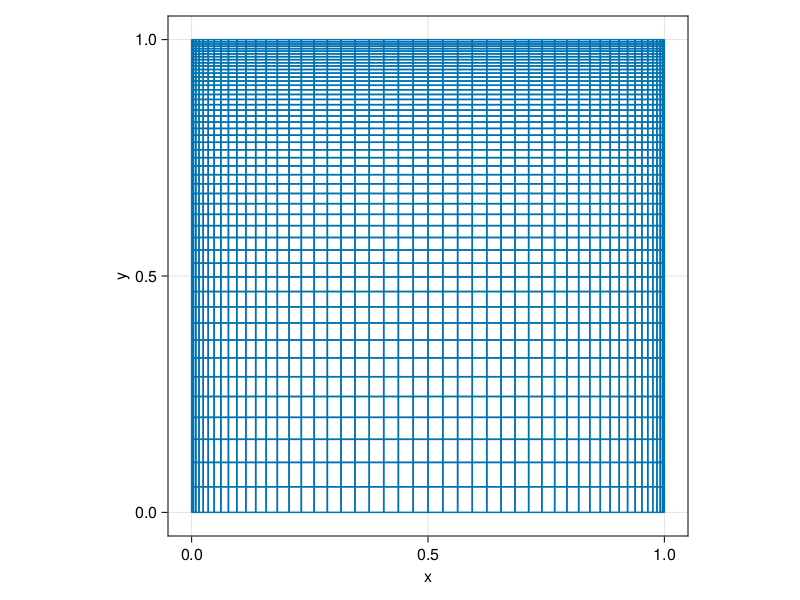

In [8]:
plot_grid(grid)

The body forces are specified as plain Julia functions.

In [9]:
bodyforce_u(x, y) = 0
bodyforce_v(x, y) = 0
force = SteadyBodyForce(bodyforce_u, bodyforce_v, grid)

SteadyBodyForce{typeof(Main.var"##319".bodyforce_u), typeof(Main.var"##319".bodyforce_v), Nothing, Float64}(Main.var"##319".bodyforce_u, Main.var"##319".bodyforce_v, nothing, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

We may now assemble our setup and discrete operators.

In [10]:
setup = Setup(; viscosity_model, convection_model, grid, force, boundary_conditions)

Setup{Float64, 2, LaminarModel{Float64}, NoRegConvectionModel, SteadyBodyForce{typeof(Main.var"##319".bodyforce_u), typeof(Main.var"##319".bodyforce_v), Nothing, Float64}}(Grid{Float64, 2}(false, 81.0, 1.125, 50, 50, 1, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), [0.0, 0.0009866357858642205, 0.003942649342761062, 0.00885637463565564, 0.015708419435684462, 0.024471741852423234, 0.03511175705587427, 0.04758647376699027, 0.06184665997806821, 0.07783603724899246  …  0.9221639627510074, 0.9381533400219317, 0.9524135262330098, 0.9648882429441257, 0.9755282581475768, 0.9842915805643155, 0.9911436253643443, 0.9960573506572389, 0.9990133642141358, 1.0], [0.0, 0.054167951704709075, 0.10562750582418264, 0.15451408223768262, 0.20095632983050754, 0.24507646504369132, 0.28699059349621575, 0.3268090155261141, 0.3646365164545174, 0.40057264233650064  …  0.9510954685787368, 0.9577086468545091, 0.9639911662164926, 0.969959559610377, 0.9756295333345673, 0.981016008372548, 0.9861331596586296, 0.990994453380407, 0

We also choos a pressure solver. The direct solver will precompute the LU decomposition of
the Poisson matrix.

In [11]:
pressure_solver = DirectPressureSolver(setup)

DirectPressureSolver{Float64, SuiteSparse.CHOLMOD.Factor{Float64}}(SuiteSparse.CHOLMOD.Factor{Float64}
type:    LDLt
method:  simplicial
maxnnz:  35913
nnz:     35913
success: true
)

We will solve for a time interval of ten seconds.

In [12]:
t_start, t_end = tlims = (0.0, 10.0)

(0.0, 10.0)

The initial conditions are defined as plain Julia functions.

In [13]:
initial_velocity_u(x, y) = 0
initial_velocity_v(x, y) = 0
initial_pressure(x, y) = 0
V₀, p₀ = create_initial_conditions(
    setup,
    t_start;
    initial_velocity_u,
    initial_velocity_v,
    initial_pressure,
    pressure_solver,
)

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

## Solve problems

There are many different problems. They can all be solved by calling the `solve`
function.

A `SteadyStateProblem` is for computing a state where the right hand side of the
momentum equation is zero.

In [14]:
problem = SteadyStateProblem(setup, V₀, p₀)
V, p = @time solve(problem)

Initial momentum residual = 0.014311824555321383
Iteration 1: momentum residual = 0.0007103728974534346
Iteration 2: momentum residual = 0.0003605308524940895
Iteration 3: momentum residual = 0.0003696862478019476
Iteration 4: momentum residual = 0.00021275548611372874
Iteration 5: momentum residual = 4.1793701393364705e-5
Iteration 6: momentum residual = 6.605212993158479e-6
Iteration 7: momentum residual = 7.667950404326032e-9
Iteration 8: momentum residual = 1.7056817655340673e-14
  1.533965 seconds (889.32 k allocations: 256.662 MiB, 3.32% gc time, 71.76% compilation time)


([1.8953917459328714e-6, 2.98202984798004e-5, 0.0001455441543629408, 0.0004354215856034719, 0.0009859320903813935, 0.0018526127030774268, 0.0030291598383826736, 0.00442686228626534, 0.005874732392830698, 0.0071455083596960725  …  -0.0029216875759004116, -0.0042579817345670895, -0.006360981223333299, -0.010102967042282805, -0.017821415875549584, -0.03685702131497223, -0.10432744069696022, -0.27582727978270843, -0.36106305515468196, -0.12113356447478353], [0.4158927046922821, 0.4159002280186966, 0.4159142573303448, 0.41593244416464215, 0.41595059093364267, 0.41596218237883087, 0.4159583711536564, 0.4159288460793614, 0.4158637162400612, 0.41575588321022694  …  0.5351411828050228, 0.5814825411283345, 0.6384596327164406, 0.7086496751222604, 0.7971907128890867, 0.9151930626280309, 1.087694467703887, 1.3581041695251954, 1.7049793904593518, 1.9761761550658026])

For this test case, the same steady state may be obtained by solving an
`UnsteadyProblem` for a sufficiently long time.

In [15]:
problem = UnsteadyProblem(setup, V₀, p₀, tlims)

UnsteadyProblem{Float64, 2}(Setup{Float64, 2, LaminarModel{Float64}, NoRegConvectionModel, SteadyBodyForce{typeof(Main.var"##319".bodyforce_u), typeof(Main.var"##319".bodyforce_v), Nothing, Float64}}(Grid{Float64, 2}(false, 81.0, 1.125, 50, 50, 1, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), [0.0, 0.0009866357858642205, 0.003942649342761062, 0.00885637463565564, 0.015708419435684462, 0.024471741852423234, 0.03511175705587427, 0.04758647376699027, 0.06184665997806821, 0.07783603724899246  …  0.9221639627510074, 0.9381533400219317, 0.9524135262330098, 0.9648882429441257, 0.9755282581475768, 0.9842915805643155, 0.9911436253643443, 0.9960573506572389, 0.9990133642141358, 1.0], [0.0, 0.054167951704709075, 0.10562750582418264, 0.15451408223768262, 0.20095632983050754, 0.24507646504369132, 0.28699059349621575, 0.3268090155261141, 0.3646365164545174, 0.40057264233650064  …  0.9510954685787368, 0.9577086468545091, 0.9639911662164926, 0.969959559610377, 0.9756295333345673, 0.981016008372548, 0.9861331596

We may also define a list of iteration processors. They are processed after every
`nupdate` iteration.

In [16]:
logger = Logger(; nupdate = 1)
plotter = RealTimePlotter(; nupdate = 50, fieldname = :vorticity, type = contourf)
writer = VTKWriter(; nupdate = 20, dir = "output/LidDrivenCavity2D")
tracer = QuantityTracer(; nupdate = 10)
# processors = [logger, plotter, writer, tracer]
processors = [logger, plotter, tracer]

3-element Vector{IncompressibleNavierStokes.Processor}:
 Logger(1)
 RealTimePlotter{typeof(Makie.contourf)}(50, :vorticity, Makie.contourf, Observable{Nothing} with 0 listeners. Value:
nothing, Observable{Nothing} with 0 listeners. Value:
nothing)
 QuantityTracer(10, Float64[], Float64[], Float64[], Float64[], Float64[], Float64[])

A ODE method is needed. Here we will opt for a standard fourth order Runge-Kutta method
with a fixed time step.

Iteration 0	t = 0
Iteration 1	t = 0.001
Iteration 2	t = 0.002
Iteration 3	t = 0.003
Iteration 4	t = 0.004
Iteration 5	t = 0.005
Iteration 6	t = 0.006
Iteration 7	t = 0.007
Iteration 8	t = 0.008
Iteration 9	t = 0.009
Iteration 10	t = 0.01
Iteration 11	t = 0.011
Iteration 12	t = 0.012
Iteration 13	t = 0.013
Iteration 14	t = 0.014
Iteration 15	t = 0.015
Iteration 16	t = 0.016
Iteration 17	t = 0.017
Iteration 18	t = 0.018
Iteration 19	t = 0.019
Iteration 20	t = 0.02
Iteration 21	t = 0.021
Iteration 22	t = 0.022
Iteration 23	t = 0.023
Iteration 24	t = 0.024
Iteration 25	t = 0.025
Iteration 26	t = 0.026
Iteration 27	t = 0.027
Iteration 28	t = 0.028
Iteration 29	t = 0.029
Iteration 30	t = 0.03
Iteration 31	t = 0.031
Iteration 32	t = 0.032
Iteration 33	t = 0.033
Iteration 34	t = 0.034
Iteration 35	t = 0.035
Iteration 36	t = 0.036
Iteration 37	t = 0.037
Iteration 38	t = 0.038
Iteration 39	t = 0.039
Iteration 40	t = 0.04
Iteration 41	t = 0.041
Iteration 42	t = 0.042
Iteration 43	t = 0.043
Iterat

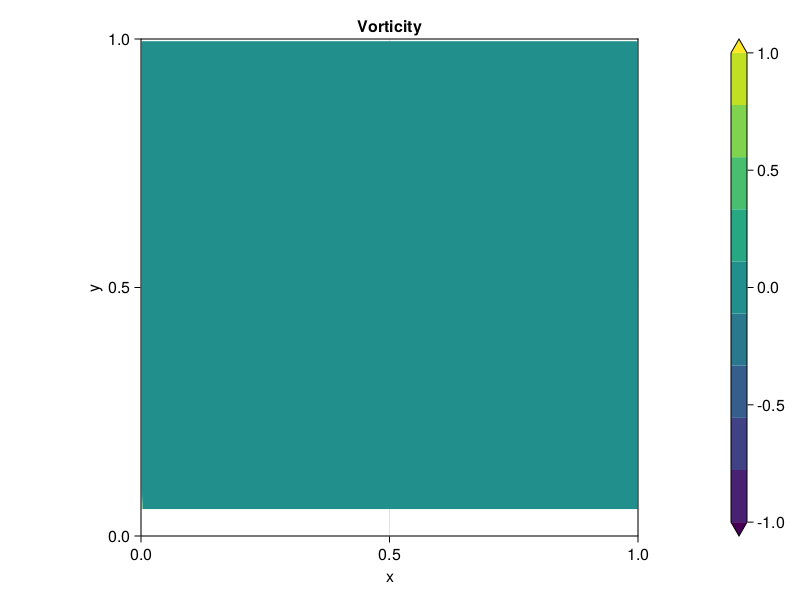

([-2.6663250147206083e-8, -6.548495428124935e-7, -5.588490091268208e-6, -2.6443184966814733e-5, -8.676353636626662e-5, -0.00022188826088244155, -0.0004733680038414256, -0.0008797013840041318, -0.0014674057118316838, -0.0022465435153815453  …  -0.003071527981690312, -0.004522285926047103, -0.006679100475073125, -0.010377474606865389, -0.017953701116734798, -0.036828042360803497, -0.10424256724133274, -0.27576223928123267, -0.3610199684496938, -0.12112144513810962], [0.13769659698521539, 0.1376964105487776, 0.13769559002778742, 0.13769335151147652, 0.1376887861842513, 0.13768113454874276, 0.13767004794173643, 0.13765573803220083, 0.1376389431215267, 0.13762072567858305  …  0.22867288485591794, 0.2744938530708024, 0.3322913952771687, 0.40393945018456817, 0.49380201351640246, 0.612527104427266, 0.7852018315065716, 1.055583941920003, 1.4024325668573494, 1.6736183898084467])

In [17]:
V, p = @time solve(problem, RK44(); Δt = 0.001, processors, pressure_solver)

## Postprocess

The `tracer` object contains a history of some quantities related to the momentum and
energy.

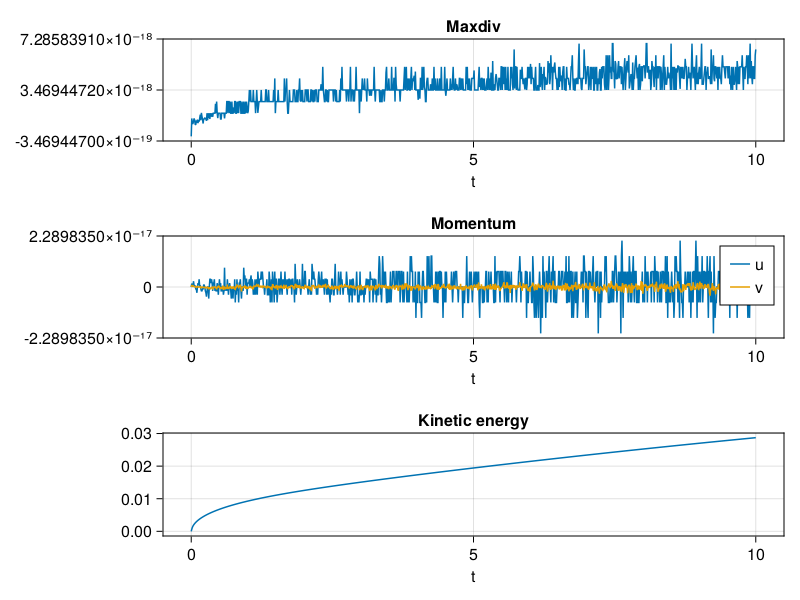

In [18]:
plot_tracers(tracer)

We may also plot the final pressure field,

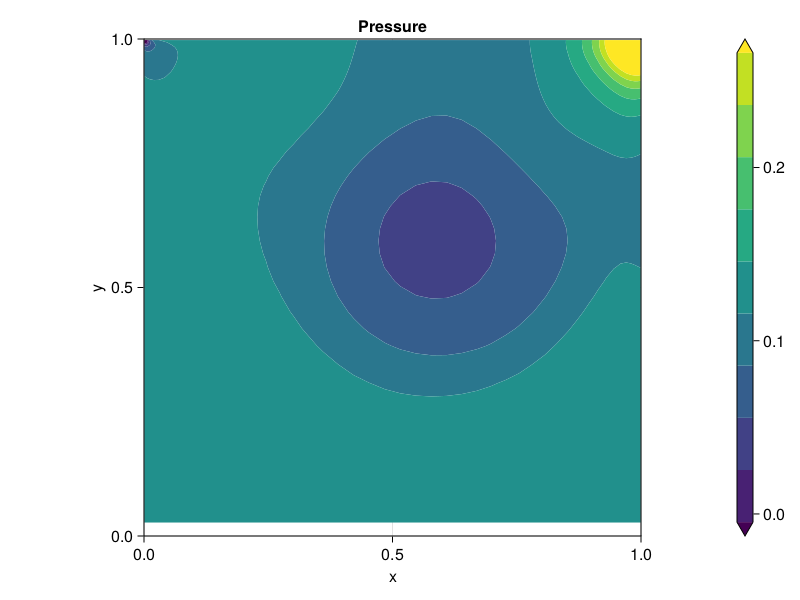

In [19]:
plot_pressure(setup, p)

velocity field,

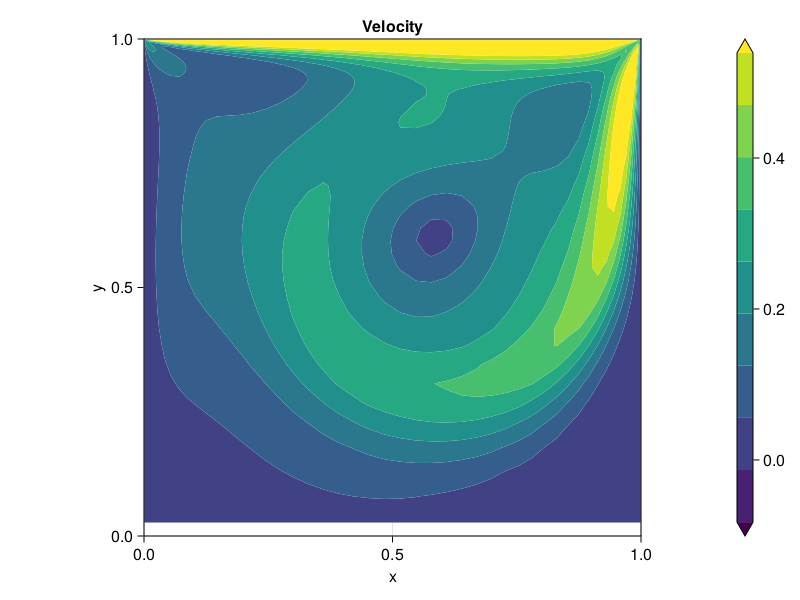

In [20]:
plot_velocity(setup, V, t_end)

vorticity field,

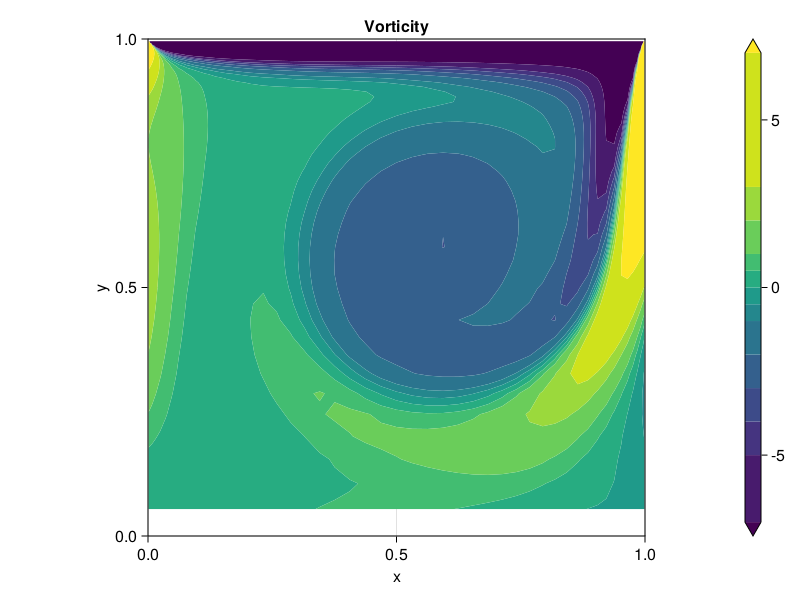

In [21]:
levels = [-7, -5, -4, -3, -2, -1, -0.5, 0, 0.5, 1, 2, 3, 7]
plot_vorticity(setup, V, tlims[2]; levels)

or streamfunction.

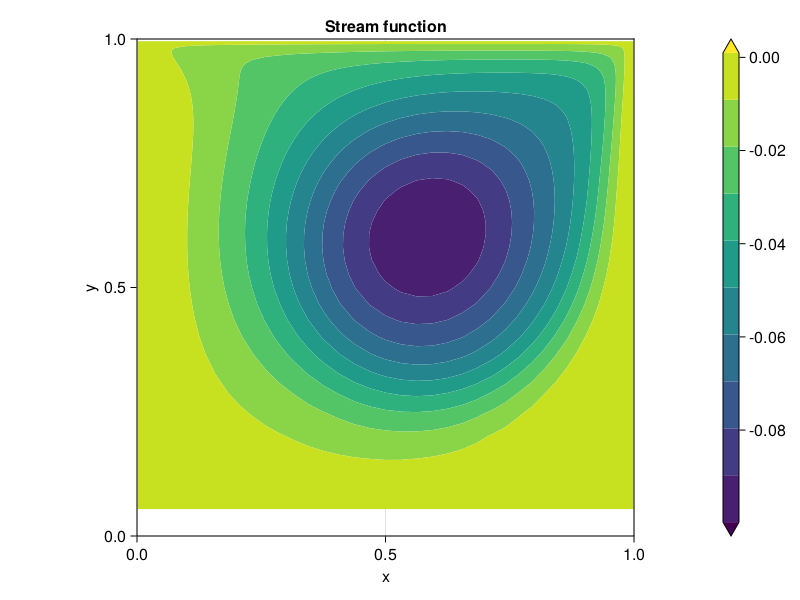

In [22]:
plot_streamfunction(setup, V, tlims[2])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*